### Social Media Sentiment Analysis using NLP and Machine Learning

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Loading Data
train_df = pd.read_csv("train.csv")

In [3]:
#Training Data Set
train_df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
# Training Data Set Information
print("Training Data Set Info - Total Rows | Total Columns | Total Null Values")
print(train_df.info())

Training Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


**Data processing & cleaning**

#### Step 1: Removing words whom length is 1

In [5]:
train_df['clean_tweet'] = train_df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
train_df['clean_tweet'][0:5]

0    @user when father is dysfunctional and is so s...
1    @user @user thanks for #lyft credit can't use ...
2                                  bihday your majesty
3    #model love take with all the time in urð±!!...
4                  factsguide: society now #motivation
Name: clean_tweet, dtype: object

#### Step 2: Replacing Numbers (integers) with space

In [6]:
train_df['clean_tweet'] = train_df['tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
train_df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user use...
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here i m it s so gr...


### Natural Language Preprocessing(NLP)

#### 1.Removing punctuations like . , ! $( ) * % @

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [8]:
# remove twitter handles (@user)
train_df['clean_tweet'] = np.vectorize(remove_pattern)(train_df['clean_tweet'], "@[\w]*")
train_df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user use...
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here i m it s so gr...


#### 2.Lower casing

In [9]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: x.lower())
train_df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user use...
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here i m it s so gr...


#### 3.Tokenization

In [10]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
# Creating token for the clean tweets
train_df['tweet_token'] = train_df['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
train_df.head(10)

,id,label,tweet,clean_tweet,tweet_token
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,"[user, when, a, father, is, dysfunctional, and..."
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t us...,"[user, user, thanks, for, lyft, credit, i, can..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]"
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...,"[huge, fan, fare, and, big, talking, before, t..."
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user use...,"[user, camping, tomorrow, user, user, user, us..."
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...,"[the, next, school, year, is, the, year, for, ..."
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...,"[we, won, love, the, land, allin, cavs, champi..."
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here i m it s so gr...,"[user, user, welcome, here, i, m, it, s, so, gr]"


#### 4.Removing Stopwords

In [12]:
# Importing stop words from NLTK corpus for english language
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
# Created new columns of tokens - where stop words are being removed
train_df['tweet_token_filtered'] = train_df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
train_df[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[user, when, a, father, is, dysfunctional, and...","[user, father, dysfunctional, selfish, drags, ..."
1,"[user, user, thanks, for, lyft, credit, i, can...","[user, user, thanks, lyft, credit, use, cause,..."
2,"[bihday, your, majesty]","[bihday, majesty]"
3,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur]"
4,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"
5,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ..."
6,"[user, camping, tomorrow, user, user, user, us...","[user, camping, tomorrow, user, user, user, us..."
7,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, think, schoo..."
8,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland..."
9,"[user, user, welcome, here, i, m, it, s, so, gr]","[user, user, welcome, gr]"


#### 5.Stemming

In [14]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [15]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
train_df['tweet_stemmed'] = train_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
train_df['tweet_stemmed'].head(10)

0    user father dysfunct selfish drag kid dysfunct...
1    user user thank lyft credit use caus offer whe...
2                                       bihday majesti
3                          model love u take u time ur
4                              factsguid societi motiv
5    huge fan fare big talk leav chao pay disput ge...
6    user camp tomorrow user user user user user us...
7    next school year year exam think school exam h...
8    love land allin cav champion cleveland clevela...
9                                  user user welcom gr
Name: tweet_stemmed, dtype: object

#### 6.Lemmatization

In [16]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [17]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
nltk.download('wordnet')
train_df['tweet_lemmatized'] = train_df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
train_df['tweet_lemmatized'].head(10)

In [18]:
train_df.head(10)

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,"[user, when, a, father, is, dysfunctional, and...","[user, father, dysfunctional, selfish, drags, ...",user father dysfunct selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t us...,"[user, user, thanks, for, lyft, credit, i, can...","[user, user, thanks, lyft, credit, use, cause,...",user user thank lyft credit use caus offer whe...
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur]",model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ...",huge fan fare big talk leav chao pay disput ge...
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user use...,"[user, camping, tomorrow, user, user, user, us...","[user, camping, tomorrow, user, user, user, us...",user camp tomorrow user user user user user us...
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, think, schoo...",next school year year exam think school exam h...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland...",love land allin cav champion cleveland clevela...
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here i m it s so gr...,"[user, user, welcome, here, i, m, it, s, so, gr]","[user, user, welcome, gr]",user user welcom gr


**Now Data Is Cleaned & Ready For Text Analysis**

We will do our analysis on column "tweet_stemmed" 

In [19]:
from wordcloud import WordCloud

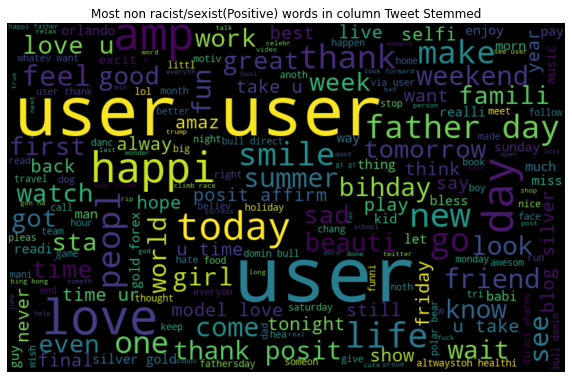

In [20]:
#Visualizing all the normal or non racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
normal_words =' '.join([text for text in train_df['tweet_stemmed'][train_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist(Positive) words in column Tweet Stemmed")
plt.show()

**Most common words in racist/sexist(Negative) tweets**

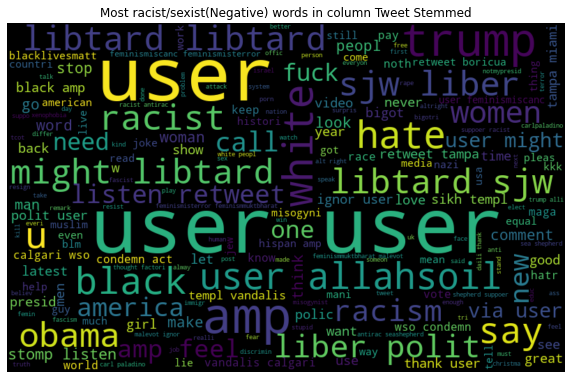

In [21]:
#Visualizing all the negative or racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
negative_words =' '.join([text for text in train_df['tweet_stemmed'][train_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist(Negative) words in column Tweet Stemmed")
plt.show()

### Extracting Features from Cleaned Tweets

#### 1.TF-IDF

In [22]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
print(tfidf_vectorizer)

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')


**TF-IDF feature matrix - For columns "train_df
['tweet_stemmed']"**

In [23]:

tfidf_stem = tfidf_vectorizer.fit_transform(train_df['tweet_stemmed'])
print(tfidf_stem)

  (0, 739)	0.6204869721266947
  (0, 460)	0.5861617983634975
  (0, 296)	0.4779759247676087
  (0, 924)	0.20724207802197456
  (1, 599)	0.5763164183320776
  (1, 136)	0.5214773266358641
  (1, 923)	0.4296051601646624
  (1, 872)	0.3341720090083963
  (1, 924)	0.3157360583157795
  (2, 83)	1.0
  (3, 920)	0.5677357818477435
  (3, 881)	0.4583632815792889
  (3, 514)	0.3612388992052073
  (3, 557)	0.5805907696567412
  (4, 566)	1.0
  (5, 630)	0.3659068096546805
  (5, 483)	0.3885533320721286
  (5, 856)	0.4016613327239274
  (5, 81)	0.39045344800053206
  (5, 291)	0.4076734285827161
  (5, 424)	0.4849280040898101
  (6, 887)	0.28194963097344555
  (6, 128)	0.3876835121598312
  (6, 924)	0.877613753306861
  (7, 346)	0.19676619842670806
  :	:
  (31955, 410)	0.4844190340869559
  (31955, 839)	0.40545964813992225
  (31955, 958)	0.401919491302729
  (31955, 924)	0.16480560812232029
  (31956, 941)	0.49050862790020583
  (31956, 990)	0.5082458438112708
  (31956, 887)	0.5273129843919642
  (31956, 881)	0.4253638587577134

**2. Bag of Words**

In [24]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_df['tweet_stemmed']).toarray()
y = train_df.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


**Splitting the training data into train and valid sets**

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [26]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

#### Machine Learning Models

*1.Logistic Regression*

In [27]:
#Fitting Logistic Regression classifier to the training set  
from sklearn.linear_model import LogisticRegression  
model_l= LogisticRegression()  
model_l.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred_l= model_l.predict(x_test)
y_pred_l

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [29]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_l= confusion_matrix(y_test, y_pred_l) 
cm_l

array([[7219,  241],
       [ 211,  320]], dtype=int64)

In [30]:
acc_l=model_l.score(x,y)
acc_l

0.9298542018647143

In [31]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_l))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7460
           1       0.57      0.60      0.59       531

    accuracy                           0.94      7991
   macro avg       0.77      0.79      0.78      7991
weighted avg       0.94      0.94      0.94      7991



*2.Decision Tree*

In [32]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
model_d= DecisionTreeClassifier(criterion='entropy', random_state=0)  
model_d.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
y_pred_d= model_d.predict(x_test)
y_pred_d

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_d= confusion_matrix(y_test, y_pred_d) 
cm_d

array([[7152,  308],
       [ 238,  293]], dtype=int64)

In [35]:
acc_d=model_d.score(x,y)*100
acc_d

92.98542018647143

In [36]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_d))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7460
           1       0.49      0.55      0.52       531

    accuracy                           0.93      7991
   macro avg       0.73      0.76      0.74      7991
weighted avg       0.94      0.93      0.93      7991



*3.Naive Bayes*

In [37]:
from sklearn.naive_bayes import GaussianNB 
model_g = GaussianNB() 
model_g.fit(x_train, y_train)

GaussianNB()

In [38]:
y_pred_g= model_g.predict(x_test)
y_pred_g

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_g= confusion_matrix(y_test, y_pred_g) 
cm_g

array([[4905, 2555],
       [ 109,  422]], dtype=int64)

In [40]:
acc_g=model_g.score(x,y)
acc_g

0.9372066829359865

In [41]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_g))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      7460
           1       0.14      0.79      0.24       531

    accuracy                           0.67      7991
   macro avg       0.56      0.73      0.51      7991
weighted avg       0.92      0.67      0.75      7991



*4.Random Forest*

In [42]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
model_r = RandomForestClassifier()

In [45]:
model_r.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
y_pred_r= model_r.predict(x_test)
y_pred_r

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_r)
print(cm)

[[7349  111]
 [ 228  303]]


In [48]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_r))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7460
           1       0.73      0.57      0.64       531

    accuracy                           0.96      7991
   macro avg       0.85      0.78      0.81      7991
weighted avg       0.95      0.96      0.96      7991



**Accuracy Comparison**

In [49]:

acc_l=model_l.score(x_train, y_train)
print("Accuracy of Logistic Regression :",acc_l)

acc_d=model_d.score(x_train, y_train)
print("Accuracy of Decision Tree\t :",acc_d)

acc_g=model_g.score(x_train, y_train)
print("Accuracy of Naive Bayes\t:",acc_g)

acc_r=model_r.score(x_train, y_train)
print("Accuracy of Random Forest\t :",acc_r)

Accuracy of Logistic Regression : 0.985941345792833
Accuracy of Decision Tree	 : 0.9993742438780193
Accuracy of Naive Bayes	: 0.6785282216011014
Accuracy of Random Forest	 : 0.9993325268032206
